Objective: to detect credit card fraud using anomaly detection. Dataset from 2013 European Cardholders. There are 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

The data is collected from https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud, already pre-cleaned.

In [1]:
#import all important libraries 
#https://scikit-learn.org/stable/modules/outlier_detection.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Load the dataset

df = pd.read_csv("creditcard.csv")

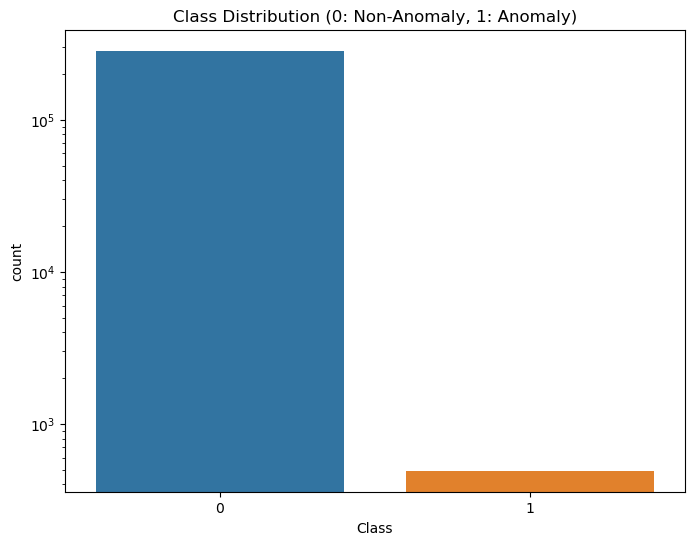

In [5]:
#The dataset is super imbalanced, let me prove it to you!
# Bar plot with log scale to visualize the imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=df)
plt.yscale('log')
plt.title('Class Distribution (0: Non-Anomaly, 1: Anomaly)')
plt.show()


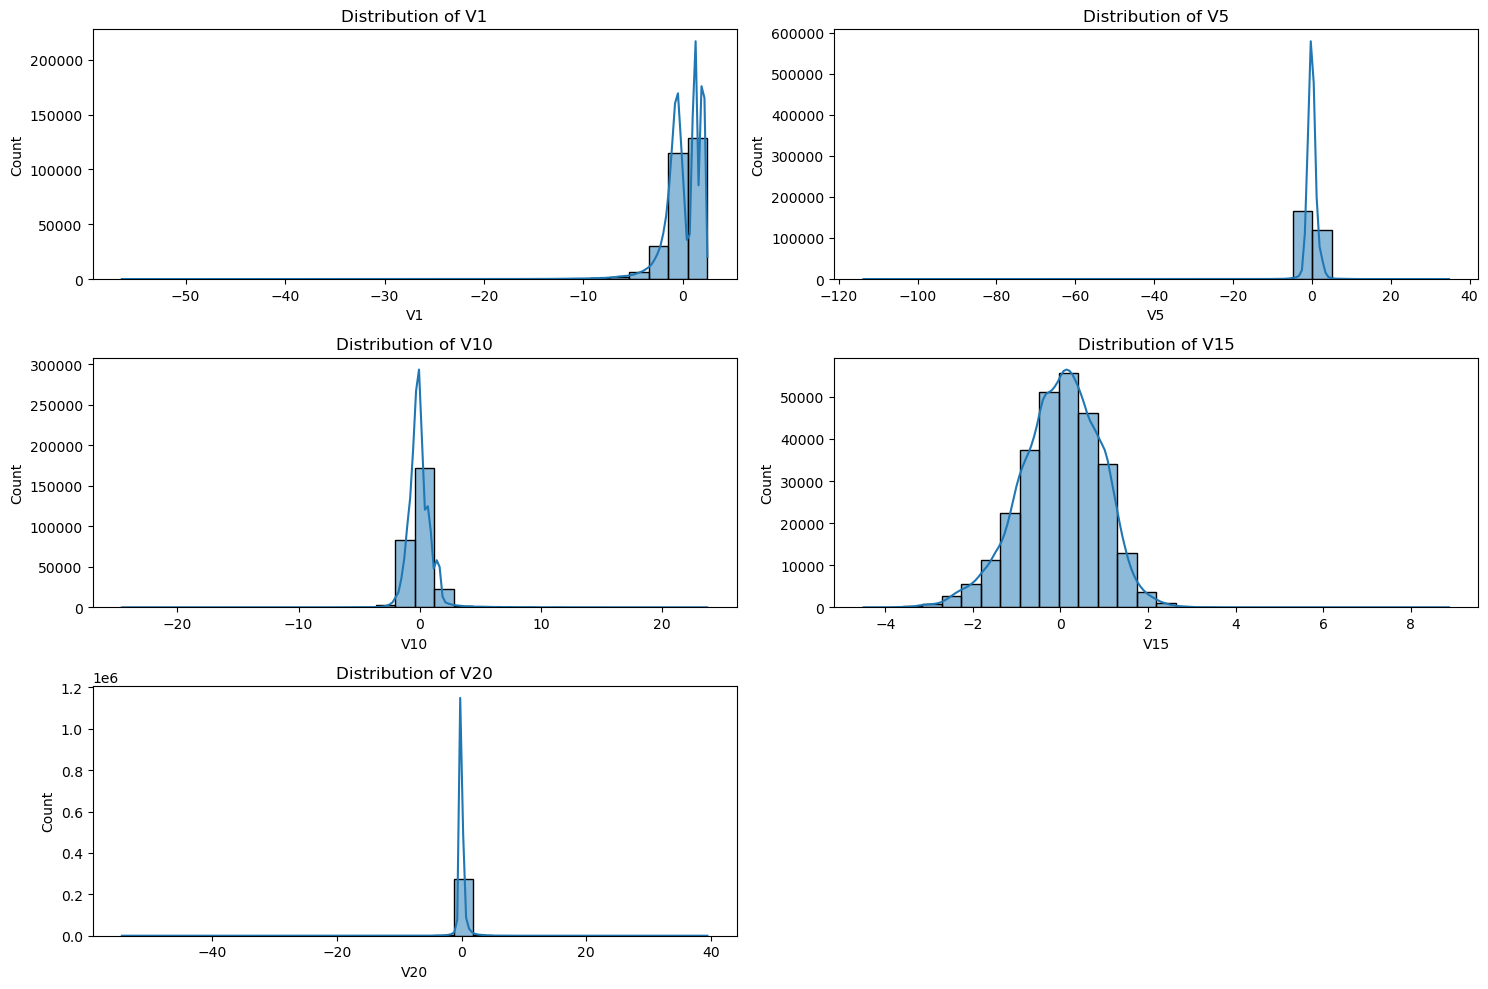

In [10]:
# Select five features for visualization
selected_features = ['V1', 'V5', 'V10', 'V15', 'V20']

# Create subplots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [6]:
# Display the first few rows of the dataset
print(df.head())

# Display summary statistics of the dataset
print(df.describe())

# Check for missing values in the dataset
print(df.isnull().sum())

X = df.drop('Class', axis=1) # X is features, axis = columns
y = df['Class'] #y is fraud label 



   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the data using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

[[85299     8]
 [   24   112]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.93      0.82      0.87       136

    accuracy                           1.00     85443
   macro avg       0.97      0.91      0.94     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9996254813150287


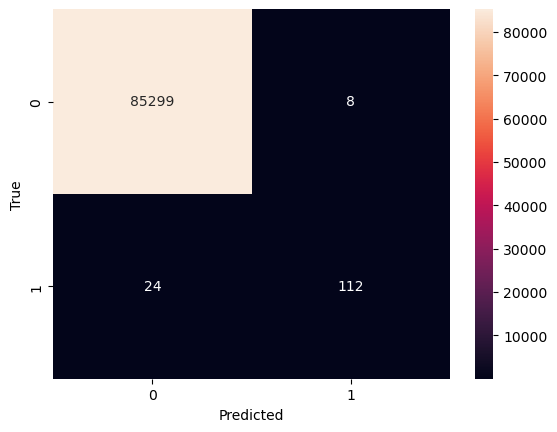

In [8]:
# Display confusion matrix, classification report, and accuracy score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot the confusion matrix using a heatmap
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="g")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

Explanation of confusion matrix shown above: 

The test set was 30% of the total data points. Of that amount, the model accurately predicted fraud 112/85443, predicted fraud falsely 8/85443, failed to predict fraud 24/85443 and accurately predicted non-fraud 85299/85443 times.  

Analysis: Through training the model on the patterns associated with fraud, the model was able to accurately predict fraud ~99% of the time. Such work is important in many fields including cybersecurity and data protection. Future work includes collection of more fraudulent examples, feature engineering and generative adversarial networks (to further generate a less inbalanced dataset).